In [178]:
import neo
import pylab as plt
import numpy as np
%matplotlib notebook

<IPython.core.display.Javascript object>


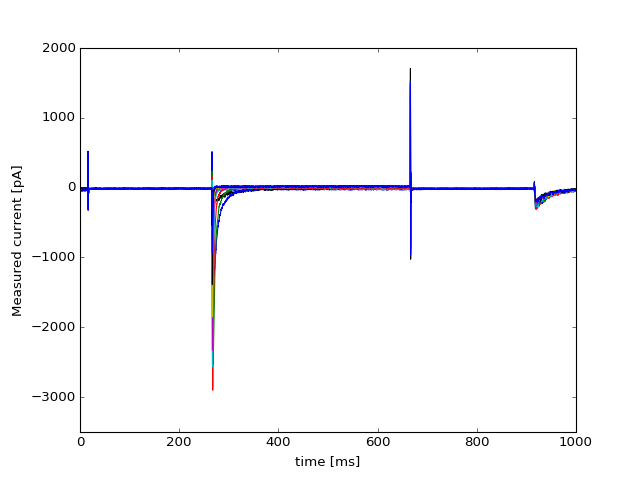

In [187]:
f = neo.io.AxonIO('active/Active1.abf')
bl = f.read_block()
t = np.linspace(0.2, 1000, 5000)

plt.figure()
for idx, seg in enumerate(bl.segments):
    I = seg.analogsignals[0]
    plt.plot(t, I)
    plt.xlabel('time [ms]')
    plt.ylabel('Measured current [pA]')
    plt.xlim([0, 1000])
    plt.ylim([-3500, 2000])
    #print (seg.all_data)
plt.show()

<IPython.core.display.Javascript object>


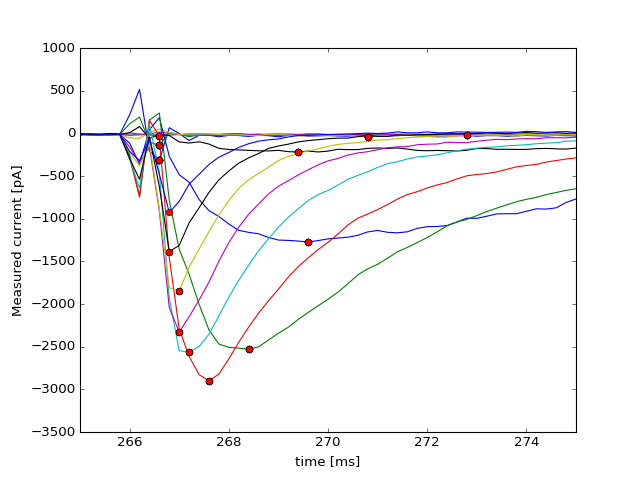

In [188]:
plt.figure()

peak = np.zeros(15)
peak_index = np.zeros(15)
t_peak = np.zeros(15)
ind = int(0)

# loop to find peaks and store them
for seg in bl.segments:
    I = seg.analogsignals[0]
    # define a search range for finding the peak inward current
    start = int(5000*(266.4/1000))
    finish = int(1500)
    search = I[start:finish] 
    # find the peak value, its index, and the time at the peak
    peak[ind] = search.min()
    peak_index[ind] = search.argmin()+start
    t_peak[ind] = t[int(peak_index[ind])]
    # plot a close-up of the time-series for each voltage step and the peak you have picked out 
    plt.plot(t, seg.analogsignals[0],t_peak,peak,'ro')
    plt.xlabel('time [ms]')
    plt.ylabel('Measured current [pA]')
    plt.xlim([265, 275])
    plt.ylim([-3500, 1000])
    #print (seg.all_data)
    ind = ind+1
plt.show()

<IPython.core.display.Javascript object>


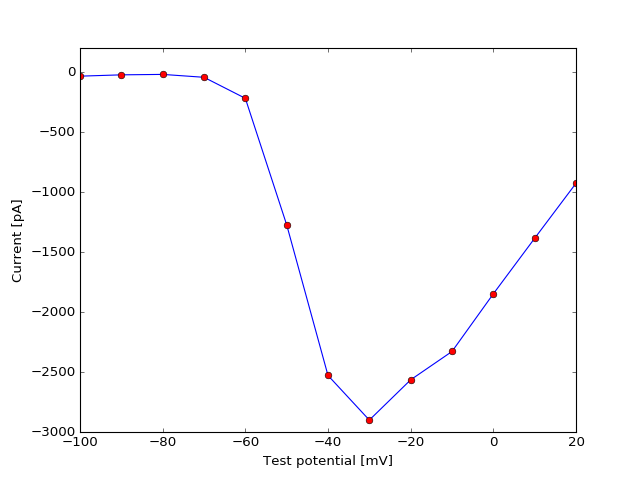

In [198]:
plt.figure()

V_steps = np.linspace(-120, 20, 15)
plt.plot(V_steps, peak,V_steps, peak,'ro')
plt.xlim([-100, 20])
plt.ylim([-3000, 200])
plt.xlabel('Test potential [mV]')
plt.ylabel('Current [pA]')
plt.show()
    
    

<IPython.core.display.Javascript object>


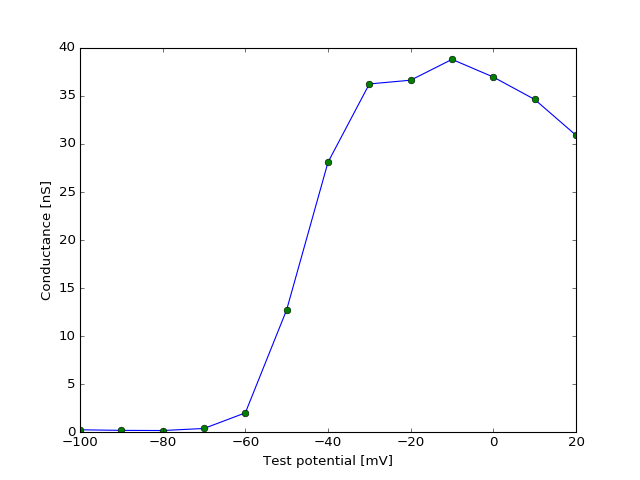

In [200]:
plt.figure()

E_Na = 50 # modify Nernst 
EC_force = V_steps-E_Na # Electrochemical force (mV)
g_Na = peak/(EC_force) # conductance (nS)
norm_g_Na = g_Na/g_Na.max() # normalized conductance

plt.plot(V_steps, g_Na,V_steps, g_Na,'go')
plt.xlim([-100, 20])
#plt.ylim([-0.10, 1.1])
plt.xlabel('Test potential [mV]')
plt.ylabel('Conductance [nS]')
plt.show()